## EDA

Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]

- N : Non-ecotic beats (normal beat) 
- S : Supraventricular ectopic beats 
- V : Ventricular ectopic beats 
- F : Fusion Beats 
- Q : Unknown Beats 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

In [2]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout, Input, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [9]:
train_df=pd.read_csv('/Users/alberttamman/Documents/ITC/hackathon/heartwave/datasets/mitbih_train.csv',header=None)
test_df=pd.read_csv('/Users/alberttamman/Documents/ITC/hackathon/heartwave/datasets/mitbih_test.csv',header=None)

In [10]:
train_df.shape

(87554, 188)

In [11]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
train_df[187] = train_df[187].astype(int)
train_df[187].value_counts()

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64

Text(0.5, 1.0, 'Target Distribution')

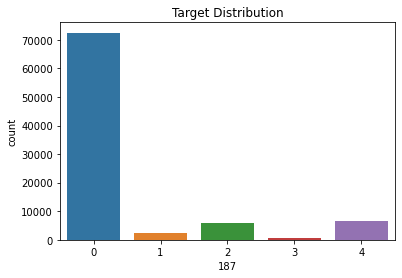

In [13]:
sns.countplot(x=train_df[187])
plt.title('Target Distribution')

We can see that the dataset is very unbalanced

In [14]:
df_1 = train_df[train_df[187]==1]
df_2 = train_df[train_df[187]==2]
df_3 = train_df[train_df[187]==3]
df_4 = train_df[train_df[187]==4]
df_0 = (train_df[train_df[187]==0]).sample(n=20000,random_state=42)

df_1_upsample = resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample = resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample = resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample = resample(df_4,replace=True,n_samples=20000,random_state=126)

train_df = pd.concat([df_0, df_1_upsample, df_2_upsample, df_3_upsample, df_4_upsample])

In [15]:
# train_df[187] = train_df[187].astype(int)
train_df[187].value_counts()

0    20000
1    20000
2    20000
3    20000
4    20000
Name: 187, dtype: int64

In [16]:
sample_0 = train_df[train_df[187]==0].sample(1, random_state=7).iloc[0,:187]
sample_1 = train_df[train_df[187]==1].sample(1, random_state=7).iloc[0,:187]
sample_2 = train_df[train_df[187]==2].sample(1, random_state=7).iloc[0,:187]
sample_3 = train_df[train_df[187]==3].sample(1, random_state=7).iloc[0,:187]
sample_4 = train_df[train_df[187]==4].sample(1, random_state=7).iloc[0,:187]

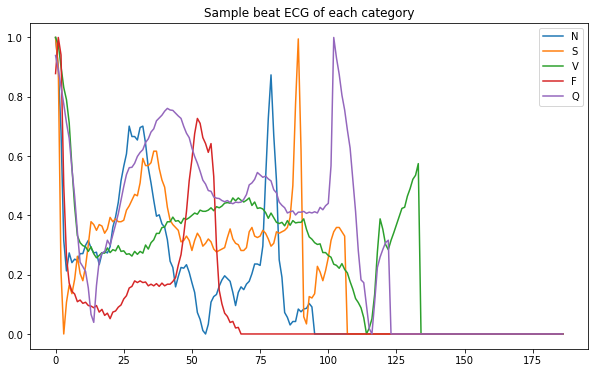

In [17]:
plt.figure(figsize=(10,6))
plt.plot(sample_0, label='N')
plt.plot(sample_1, label='S')
plt.plot(sample_2, label='V')
plt.plot(sample_3, label='F')
plt.plot(sample_4, label='Q')
plt.title('Sample beat ECG of each category')
plt.legend()
plt.show()


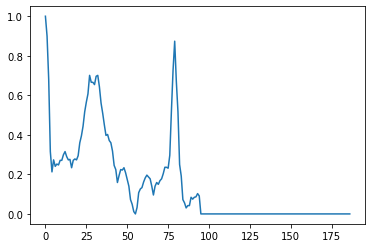

In [18]:
plt.plot(sample_0, label='N');

In [27]:
def network(X_train,y_train,X_test,y_test):
    

    im_shape=(X_train.shape[1],1)
    inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
    conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
    conv1_1=BatchNormalization()(conv1_1)
    pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
    conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)
    conv3_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool2)
    conv3_1=BatchNormalization()(conv3_1)
    pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
    flatten=Flatten()(pool3)
    dense_end1 = Dense(64, activation='relu')(flatten)
    dense_end2 = Dense(32, activation='relu')(dense_end1)
    main_output = Dense(5, activation='softmax', name='main_output')(dense_end2)
    
    
    model = Model(inputs= inputs_cnn, outputs=main_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])
    
    
    callbacks = [EarlyStopping(monitor='val_loss', patience=8),
             ModelCheckpoint(filepath='weights.h5', monitor='val_loss', save_best_only=True)]

    history=model.fit(X_train, y_train,epochs=40,callbacks=callbacks, batch_size=32,validation_data=(X_test,y_test))
    model.load_weights('weights.h5')
    model.save('model.h5')
    return(model, history)

In [28]:
X_train=train_df.iloc[:,:186].values
X_test=test_df.iloc[:,:186].values

X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

In [77]:
test_df.iloc[:1,:].values

array([[1.        , 0.75826448, 0.11157025, 0.        , 0.08057851,
        0.0785124 , 0.0661157 , 0.04958678, 0.04752066, 0.03512397,
        0.03099173, 0.02892562, 0.03512397, 0.0268595 , 0.0392562 ,
        0.03512397, 0.04338843, 0.04752066, 0.05371901, 0.05371901,
        0.07024793, 0.07231405, 0.08471075, 0.09710744, 0.12190083,
        0.1322314 , 0.16942149, 0.19628099, 0.21487603, 0.23553719,
        0.25413224, 0.2644628 , 0.28512397, 0.27272728, 0.26652893,
        0.23966943, 0.21487603, 0.17355372, 0.1570248 , 0.12396694,
        0.12190083, 0.10743801, 0.1053719 , 0.09710744, 0.1053719 ,
        0.09917355, 0.1053719 , 0.09917355, 0.10743801, 0.10743801,
        0.11570248, 0.11157025, 0.12190083, 0.11157025, 0.11983471,
        0.11157025, 0.11363637, 0.11157025, 0.12190083, 0.1053719 ,
        0.10743801, 0.10123967, 0.10123967, 0.08677686, 0.09297521,
        0.08471075, 0.08264463, 0.0785124 , 0.0785124 , 0.07024793,
        0.07644628, 0.06818182, 0.0785124 , 0.07

In [72]:
aa = test_df.iloc[:1,:].values
aa = aa.reshape(len(aa), aa.shape[1],1)
aa.shape

(1, 188, 1)

In [29]:
target_train=train_df[187]
target_test=test_df[187]
y_train=to_categorical(target_train)
y_test=to_categorical(target_test)

In [30]:
model, history=network(X_train, y_train, X_test, y_test)

Epoch 1/40
3125/3125 [==============================] - 74s 23ms/step - loss: 0.3240 - accuracy: 0.8852 - val_loss: 0.1717 - val_accuracy: 0.9430
Epoch 2/40
3125/3125 [==============================] - 79s 25ms/step - loss: 0.0796 - accuracy: 0.9716 - val_loss: 0.1303 - val_accuracy: 0.9613
Epoch 3/40
3125/3125 [==============================] - 77s 25ms/step - loss: 0.0483 - accuracy: 0.9832 - val_loss: 0.1486 - val_accuracy: 0.9566
Epoch 4/40
3125/3125 [==============================] - 77s 25ms/step - loss: 0.0391 - accuracy: 0.9871 - val_loss: 0.1634 - val_accuracy: 0.9528
Epoch 5/40
3125/3125 [==============================] - 79s 25ms/step - loss: 0.0267 - accuracy: 0.9912 - val_loss: 0.1503 - val_accuracy: 0.9630
Epoch 6/40
3125/3125 [==============================] - 72s 23ms/step - loss: 0.0212 - accuracy: 0.9933 - val_loss: 0.1759 - val_accuracy: 0.9568
Epoch 7/40
3125/3125 [==============================] - 68s 22ms/step - loss: 0.0223 - accuracy: 0.9932 - val_loss: 0.1398 -

In [31]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs_cnn (InputLayer)      [(None, 186, 1)]          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 181, 64)           448       
_________________________________________________________________
batch_normalization_3 (Batch (None, 181, 64)           256       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 91, 64)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 89, 64)            12352     
_________________________________________________________________
batch_normalization_4 (Batch (None, 89, 64)            256       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 45, 64)            0   

In [102]:
def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    
    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['0','1','2','3','4']
    
    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)

Accuracy: 97.52%


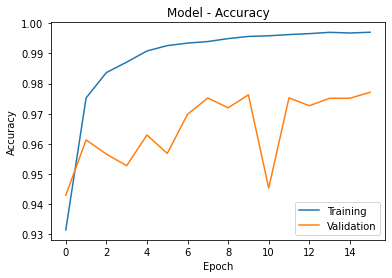

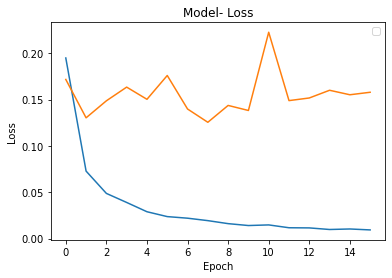

In [103]:
evaluate_model(history,X_test,y_test,model)

In [32]:
data_sample = test_df.iloc[:,:187].sample(1, random_state=7)

In [33]:
data_sample

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
20151,0.855491,0.959538,1.0,0.662813,0.325626,0.169557,0.1079,0.096339,0.067437,0.075145,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
data_sample.shape

(1, 187)

In [45]:
import json
import requests
with open('/Users/alberttamman/PycharmProjects/heartwave_server/sample_data.json') as json_file:
    data = json.load(json_file)
    print("Input file is:\n", data)

Input file is:
 {'0': {'20151': 0.8554913402}, '1': {'20151': 0.9595375657}, '2': {'20151': 1.0}, '3': {'20151': 0.662813127}, '4': {'20151': 0.3256261945}, '5': {'20151': 0.1695568413}, '6': {'20151': 0.1078998074}, '7': {'20151': 0.096339114}, '8': {'20151': 0.0674373806}, '9': {'20151': 0.075144507}, '10': {'20151': 0.0539499037}, '11': {'20151': 0.0558766872}, '12': {'20151': 0.0443159938}, '13': {'20151': 0.0539499037}, '14': {'20151': 0.0346820801}, '15': {'20151': 0.0385356471}, '16': {'20151': 0.0173410401}, '17': {'20151': 0.0250481702}, '18': {'20151': 0.0096339118}, '19': {'20151': 0.0134874759}, '20': {'20151': 0.0038535646}, '21': {'20151': 0.0115606934}, '22': {'20151': 0.0}, '23': {'20151': 0.0134874759}, '24': {'20151': 0.0096339118}, '25': {'20151': 0.0404624268}, '26': {'20151': 0.0404624268}, '27': {'20151': 0.0770712942}, '28': {'20151': 0.0809248537}, '29': {'20151': 0.117533721}, '30': {'20151': 0.1213872805}, '31': {'20151': 0.1579961479}, '32': {'20151': 0.15028

In [93]:
response = requests.post('http://127.0.0.1:5000/json', json=data)
print(response.text)

{
  "prediction": "[[1.0753256e-06 1.1398250e-12 4.1432122e-07 9.9999857e-01 4.7910710e-11]]", 
  "success": true
}



In [95]:

response = requests.post('https://heartwave-app.herokuapp.com/json', json=data)
print(response.text)

{"prediction":"[[1.0753205e-06 1.1398207e-12 4.1431963e-07 9.9999857e-01 4.7910526e-11]]","success":true}



In [101]:
data_sample.to_csv('data_sample1')

In [129]:
data_sample2 = test_df.iloc[:,:187].sample(1, random_state=8)
data_sample2.to_csv('data/heartwave_data2')

In [133]:
a = 3
aa = print(f'heartwave_data{1}')

heartwave_data1


In [134]:
for i in range(1, 21):
    data_sample = test_df.iloc[:,:187].sample(1, random_state=i)
    data_sample.to_csv(f'data/heartwave_data{i}')

In [107]:
data_sample2

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
1322,1.0,0.89339,0.66951,0.469083,0.217484,0.059701,0.0,0.010661,0.029851,0.081023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
y_test[1623]

array([1., 0., 0., 0., 0.], dtype=float32)

In [113]:
bb = data_sample2.to_json()

In [124]:
data_sample2

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
1322,1.0,0.89339,0.66951,0.469083,0.217484,0.059701,0.0,0.010661,0.029851,0.081023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
type(bb)

str

In [116]:
from flask import jsonify

In [120]:
eval(bb)
bb

'{"0":{"1322":1.0},"1":{"1322":0.8933901787},"2":{"1322":0.6695095897},"3":{"1322":0.4690831602},"4":{"1322":0.2174840122},"5":{"1322":0.0597014911},"6":{"1322":0.0},"7":{"1322":0.0106609808},"8":{"1322":0.0298507456},"9":{"1322":0.0810234547},"10":{"1322":0.1108741984},"11":{"1322":0.1385927498},"12":{"1322":0.1663112938},"13":{"1322":0.1727078855},"14":{"1322":0.1748400927},"15":{"1322":0.1812366694},"16":{"1322":0.1727078855},"17":{"1322":0.1663112938},"18":{"1322":0.1641791016},"19":{"1322":0.1556503177},"20":{"1322":0.149253726},"21":{"1322":0.1513859332},"22":{"1322":0.149253726},"23":{"1322":0.1449893415},"24":{"1322":0.1428571492},"25":{"1322":0.1556503177},"26":{"1322":0.1599147171},"27":{"1322":0.1641791016},"28":{"1322":0.1663112938},"29":{"1322":0.1855010688},"30":{"1322":0.196162045},"31":{"1322":0.2132196128},"32":{"1322":0.2345415801},"33":{"1322":0.251599133},"34":{"1322":0.2665245235},"35":{"1322":0.2835820913},"36":{"1322":0.298507452},"37":{"1322":0.317697227},"38":{

In [127]:
vv = [0.9, 0.1, 0.1]
np.array(vv).argmax()

0

In [128]:
vv.idmax()

AttributeError: 'list' object has no attribute 'idmax'